##  1. Find the probability for the case of l > t.


\begin{align}
\int_{\theta=0}^\frac{\pi}{2}\int_{x=0}^{m(\theta)}\frac{4}{t\pi}dxd\theta\\
\end{align}

where m(theta) between 
\begin{align} \frac{l}{2}cos\theta \end{align} AND
\begin{align} \frac{t}{2}  \end{align}


\begin{align}
&P(l>t) = \frac{2}{\pi}\cos^{-1}\frac{t}{l}+\frac{2}{\pi}\frac{l}{t}\{1-\sqrt{1-(\frac{t}{l})^2}\}
\end{align}

## 2. Find the probability using Monte Carlo simulation for l < t, for the general case 
# AND
## Find the value of the π using some special case (e.g. l = 2, and t = 3)

In [29]:
import random

class Buffon_needle:
    def __init__(self,l,t,n,m):
        self.l = float(l)  #needle length
        self.t = float(t)  #space width
        self.d = [] #center of needle
        self.a = [] #angle of needle
        self.n = n  # of throws
        self.m = m  # of simulations
        self.p = self.l/self.t
        self.pi_approx = []
        self.h = 0
        self.rate = []
    def simulation(self):
        # m simulation
        for j in range(self.m):
            # n throw
            self.h = 0
            for i in range(self.n):
                #self.samples()
                d = np.random.uniform(0, self.t/2)
                self.d.append(d)
                theta = np.random.uniform(0, np.pi/2)
                self.a.append(theta)
                #condition for a hit
                if d <= self.l/2*np.sin(theta):
                    self.h += 1
                else:
                    continue
                #if self.c[i]+self.a[i]>=self.t or self.c[i]-self.a[i]<0.:
                    #self.h += 1
                #else:
                    #continue
            est =self.p*2*float(self.n)/float(self.h)
            self.pi_approx.append(est)
            self.rate.append(self.h/self.n)
        return self.pi_approx
    def probability(self):
        # probability given l and t
        self.simulation()
        return self.rate
        
            
            
            


In [30]:
y = Buffon_needle(1,2,800,5)
print (y.probability())

[0.3575, 0.30625, 0.29625, 0.3225, 0.33125]


In [31]:

y = Buffon_needle(2,3,800000,5)
print (y.simulation())

[3.1414866692976613, 3.135106431964761, 3.1387596602685006, 3.142171476152882, 3.1431066269456562]


## 3. Find the probability using Monte Carlo simulation (l > t) for the general case.


In [32]:
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt

class Buffon_needle:
    def __init__(self,l,t,n,m):
        self.l = float(l)  #needle length
        self.t = float(t)  #space width
        self.d = [] #center of needle
        self.a = [] #angle of needle
        self.n = n  # of throws
        self.m = m  # of simulations
        self.p = self.l/self.t
        self.pi_approx = []
        self.h = 0
        self.rate = []
        self.ltplot = []
        self.rateplot = []
        self.analytic = []
    def simulation(self):
        #self.samples()
        d = np.random.uniform(0, self.t/2)
        self.d.append(d)
        theta = np.random.uniform(0, np.pi/2)
        self.a.append(theta)
        #condition for a hit
        if d <= self.l/2*np.sin(theta):
            self.h += 1
        #if self.c[i]+self.a[i]>=self.t or self.c[i]-self.a[i]<0.:
            #self.h += 1
        #else:
            #continue
        
    def run_simulation(self):
         # m simulation
        for j in range(self.m):
            # n throw
            self.h = 0
            for i in range(self.n):
                self.simulation()
            est =self.p*2*float(self.n)/float(self.h)
            self.pi_approx.append(est)
            self.rate.append(self.h/self.n)
        return self.pi_approx
    
    def probability(self):
        # probability given l and t
        self.run_simulation()
        return self.rate
    def run_simulation_plot(self):
        # m simulation
        for j in range(self.m):
            # n throw
            self.h = 0
            (t) = random.choice(np.arange(0, 100,1))
            (l) = random.choice(np.arange(0, 100,1))
            while l < t:
                (l) =  random.choice(np.arange(0, 1000,1))
            self.t = t
            self.l = l
            for i in range(self.n):
                self.simulation()
            self.ltplot.append(self.l/self.t)
            self.rateplot.append(self.h/self.n)
            flt=1/((2/np.pi)*(np.cos(self.t/self.l)**-1)+(2/np.pi)*(self.l/self.t)* (1 - np.sqrt(1-((self.t/self.l)**2))))
            if flt > 1:
                self.analytic.append(1)
            else:
                self.analytic.append(flt)
            
        new_ltplot, new_rateplot = zip(*sorted(zip(self.ltplot, self.rateplot)))
        plt.plot(new_ltplot,new_rateplot)
        plt.show()
        
        
    def run_simulation_plot_analytic(self):
        self.run_simulation_plot()
        new_ltplot, new_rateplot = zip(*sorted(zip(self.ltplot, self.analytic)))
        plt.plot(new_ltplot,new_rateplot)
        plt.show()
        


In [33]:
y = Buffon_needle(10,2,8000,5)
print (y.probability())

[0.941, 0.941, 0.937375, 0.940375, 0.934375]


## 4. After writing your general code in Part 3 plot the Probability vs l/t ratio.


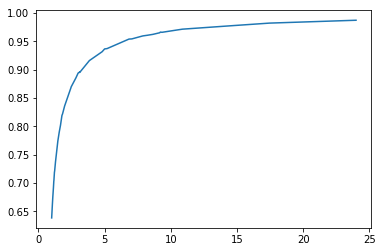

None


In [34]:
y = Buffon_needle(l,t,80000,40)

print (y.run_simulation_plot())


## 5. Plot the analytic formula for P(l/t) along side your previous result and comment on
## the result.

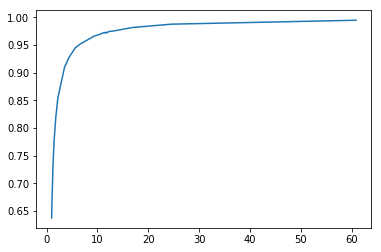

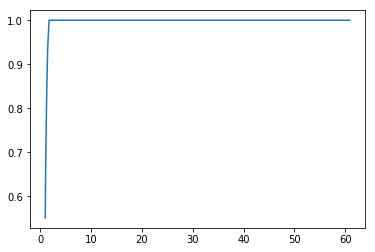

None


In [35]:
y = Buffon_needle(l,t,80000,40)

print (y.run_simulation_plot_analytic())